## Лекція 62. Image Feature Extraction

## Завдання:

### 3. Завантажте датасет CIFAR-10 та використайте HOG для витягування ознак зображень. Застосуйте будь-який простий класифікатор (наприклад SVM) для класифікації зображень та обчисліть метрики точності, такі як accuracy, precision, recall та F1-score.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle
from skimage.feature import hog
from skimage import data, exposure
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import warnings
warnings.filterwarnings("ignore")

Набір даних CIFAR-10 (Canadian Institute For Advanced Research) — це колекція зображень, які зазвичай використовуються для навчання алгоритмів машинного навчання та комп’ютерного зору. 

Це один із найпоширеніших наборів даних для досліджень машинного навчання. 

Набір даних CIFAR-10 містить 60 000 кольорових зображень 32x32 у 10 різних класах. 10 різних класів представляють літаки, автомобілі, птахів, котів, оленів, собак, жаб, коней, кораблі та вантажівки. 

Є 6000 зображень кожного класу.

![Alt-текст](CIFAR_10.JPG "Picture")

In [2]:
cifar10_dir= 'cifar-10-batches-py'

In [3]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Function to load a batch into memory
def load_batch(data_dir, batch_id):
    with open(os.path.join(cifar10_dir, 'data_batch_%i' % batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    feats = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    lbls = batch['labels']
    return feats, lbls

In [5]:
# and load the first batch
feats, labels = load_batch(cifar10_dir, 1)

Label Id: 6 - Class: frog


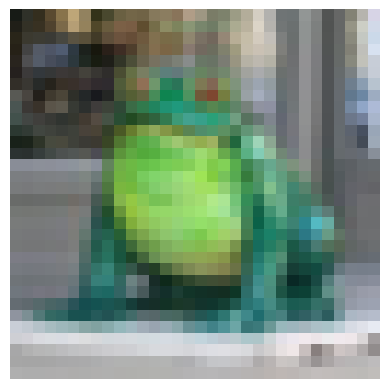

In [6]:
sample_id = 19
sample_img = feats[sample_id]
sample_lbl = labels[sample_id]
print('Label Id: {} - Class: {}'.format(sample_lbl, label_names[sample_lbl]))
plt.axis('off')
plt.imshow(sample_img);

In [7]:
fd, hog_image = hog(sample_img, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

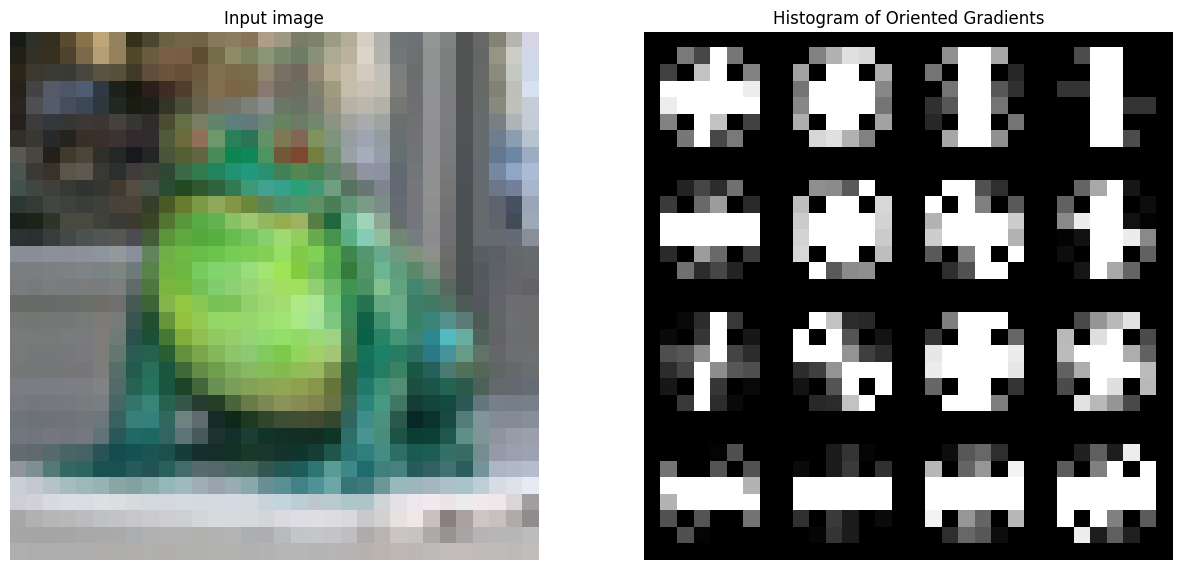

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(sample_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [9]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
# Initialize HOG parameters
win_size = (32, 32)
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
nbins = 9
deriv_aperture = 1
win_sigma = -1.
histogram_norm_type = 0
L2_hys_threshold = 0.2
gamma_correction = 1
nlevels = 64
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins, deriv_aperture, win_sigma,
                        histogram_norm_type, L2_hys_threshold, gamma_correction, nlevels)

In [11]:
# Extract HOG features for training set
X_train_hog = []
for i in range(X_train.shape[0]):
    img = X_train[i]
    hog_features = hog.compute(img)
    X_train_hog.append(hog_features)

X_train_hog = np.array(X_train_hog)

In [12]:
# Extract HOG features for test set
X_test_hog = []
for i in range(X_test.shape[0]):
    img = X_test[i]
    hog_features = hog.compute(img)
    X_test_hog.append(hog_features)

X_test_hog = np.array(X_test_hog)

In [13]:
# Scale features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

In [14]:
# Train SVM classifier
svm = LinearSVC()
svm.fit(X_train_hog, y_train)

LinearSVC()

In [15]:
# Test SVM classifier
y_pred = svm.predict(X_test_hog)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ", recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ", f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.5293
Precision Score :  0.5293
Recall Score :  0.5293
F1 Score :  0.5293


### 4. Використайте метод SIFT для витягування ознак з зображень та порівняйте його з методом HOG за допомогою метрик точності.

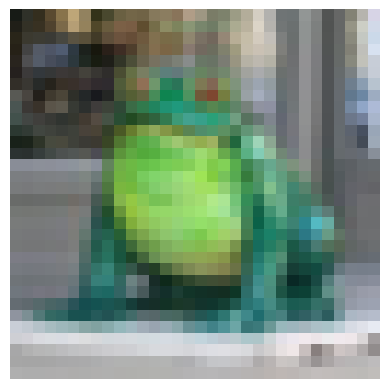

In [17]:
gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(sample_img);

In [18]:
features = cv2.SIFT_create()
keypoints = features.detect(gray, None)

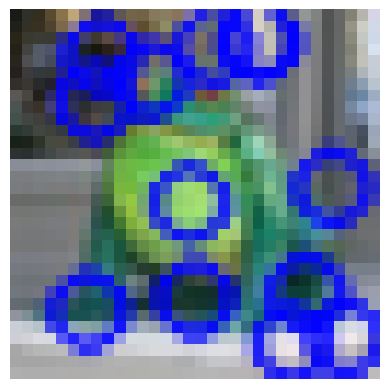

In [19]:
output_image = cv2.drawKeypoints(sample_img, keypoints, 0, (0, 0, 255),
                                 flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.axis('off')
plt.imshow(output_image);

In [20]:
#Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [21]:
#Uses SIFT to get descriptors
sift = cv2.SIFT_create()
descriptors = []

In [22]:
#Extract descritors for all imagens on the dataset
for i in np.arange(x_train.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_train[i], None)
    if imgDesc is not None:
        for j in np.arange(imgDesc.shape[0]):
            descriptors.append(imgDesc[j])

descriptors = np.array(descriptors)

In [23]:
#Apply KMeans to descriptors list to generate 10 centroids corresponding to the 10 visual words
kmeans = KMeans(n_clusters=10).fit(descriptors)

In [24]:
#For each descriptor of an image, find the closest centroid
#This return a vector with the number of each centroid for each descriptor of an image
#Create an histogram out of acho vector for each imagem
#Associate a label for each histogram

train_hist_X = []
train_hist_Y = []

for i in np.arange(x_train.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_train[i], None)
    if imgDesc is not None:
        kcent = kmeans.predict(imgDesc) #Calculate centroid for each descriptor
        hist, _ = np.histogram(kcent, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed=True)
        train_hist_X.append(hist)
        train_hist_Y.append(y_train[i])

train_hist_X = np.array(train_hist_X).reshape((-1, 10))
train_hist_Y = np.array(train_hist_Y).reshape((-1,))

In [25]:
#Train SVM classifier with histogram and label pairs from the training set
modSVM = SVC()
modSVM.fit(train_hist_X, train_hist_Y.reshape((-1,)))

conf_matrix_test = np.zeros((10, 10))

#Aplly SVM on the test set
#Extract descriptor for each image
#Find closest centroid
#Create histogram for each image
#Predict category with the SVM classifiear
#Add error or hit on the confusion matrix
#Lines correspond to true labels and columns correspond to predictions from the SVM classifier
preds = []
labels = []
for i in np.arange(x_test.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_test[i], None)
    if imgDesc is not None:
        kcent = kmeans.predict(imgDesc) #Calculate centroid for each descriptor
        hist, _ = np.histogram(kcent, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed=True)
        ret = modSVM.predict(hist.reshape((1, -1)))[0]
        preds.append(ret)
        labels.append(y_test[i, 0])
        real = y_test[i, 0]
        conf_matrix_test[real, ret] = conf_matrix_test[real, ret] + 1

In [26]:
print("Accuracy:", accuracy_score(labels, preds))
print("Precision Score : ", precision_score(labels, preds, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ", recall_score(labels, preds, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ", f1_score(labels, preds, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.220028067361668
Precision Score :  0.220028067361668
Recall Score :  0.220028067361668
F1 Score :  0.220028067361668


#### Висновки: При використанні методу HOG для витягування ознак з зображень і класифікатору SVM точніть вийшла 0.5293 а з методом SIFT 0,22. Отже можемо зробити висновок, що для даного датасету метод HOG працює краще, але також не дуже точно.